#CrisisNLP Code

#Steps to Follow to Create Final Dataset
1. Read data files
2. Binarize them
3. Use the binarized dataframe (tweet_df) to balance the dataset
4. Use TextAttack functions to create more irrel data
5. Oversample irrel data 10 times
6. Append original rel data and newly created oversampled irrel data inro a full dataframe and save it in drive
7. Read this file to the do the text pre-processing(punctuation removal)
8. Save the final pre-processed dataframe as acsv in drive

After steps 1-8 is done for all the crisis datasets then we will append all of them into a final large dataset.

On this final merged dataset we will create the train, val and test sets as nedded by our model.

#CrisisNLP Dataset Handling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [3]:
path= "/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_India_floods"

In [4]:
cd "/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_India_floods"

/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_India_floods


In [5]:
pwd

'/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_India_floods'

In [6]:
ls

2014_India_floods_CF_labeled_data.tsv  labeling-instructions.txt


In [7]:
filename= "2014_India_floods_CF_labeled_data.tsv"

In [8]:
file_path= path+'/'+filename

In [9]:
# Load dataset
def load_data(path):
    data = pd.read_csv(path, error_bad_lines=False, sep='\t')
    return data

In [ ]:
'''

def binarize_labels(data_frame):
  data_frame["label"].replace({"not_related_or_irrelevant": '0'}, inplace=True)
  data_frame.loc[data_frame.label != '0', 'label'] = '1'
  return data_frame

'''

In [10]:
tweet_df = load_data(file_path)
tweet_df.head()

,tweet_id,tweet_text,label
0,'501222299685888000',RT @lilid426: Everyone has all these intense relationship goals when my goal is just getting in ...,not_related_or_irrelevant
1,'501203294409457664',@kkfred12 @StayDvpper oh yea I would like to that damn K and shove it up their ass sideways just...,not_related_or_irrelevant
2,'501157833996767233',"RT @fruitpopniall: ""1D are about to split up"" #1DToLiveOnForever http://t.co/4nHQIq03Io",not_related_or_irrelevant
3,'501136832957259776',"@Harry_Styles You are my ☀ You 💡 up my whole day You are my entire 🌎 So please follow me, ...",not_related_or_irrelevant
4,'501049468511596544',"RT @abonetti420: Swinging blunts round, sun up till sun down",not_related_or_irrelevant


In [11]:
label_list = tweet_df.label.unique()
label_list

array(['not_related_or_irrelevant', 'other_useful_information',
       'sympathy_and_emotional_support',
       'donation_needs_or_offers_or_volunteering_services',
       'missing_trapped_or_found_people', 'injured_or_dead_people',
       'displaced_people_and_evacuations',
       'infrastructure_and_utilities_damage', 'caution_and_advice'],
      dtype=object)

In [12]:
'''
not_related_or_irrelevant == 0
sympathy_and_emotional_support == 1
infrastructure_and_utilities_damage == 2
displaced_people_and_evacuations == 3
donation_needs_or_offers_or_volunteering_services == 4
missing_trapped_or_found_people == 5
injured_or_dead_people == 6
caution_and_advice == 7
other_useful_information == 8
'''

'\nnot_related_or_irrelevant == 0\nsympathy_and_emotional_support == 1\ninfrastructure_and_utilities_damage == 2\ndisplaced_people_and_evacuations == 3\ndonation_needs_or_offers_or_volunteering_services == 4\nmissing_trapped_or_found_people == 5\ninjured_or_dead_people == 6\ncaution_and_advice == 7\nother_useful_information == 8\n'

In [13]:
def create_class_labels(data_frame):
  data_frame["label"].replace({"not_related_or_irrelevant": 0}, inplace=True)
  data_frame["label"].replace({"sympathy_and_emotional_support": 1}, inplace=True)
  data_frame["label"].replace({"infrastructure_and_utilities_damage": 2}, inplace=True)
  data_frame["label"].replace({"displaced_people_and_evacuations": 3}, inplace=True)
  data_frame["label"].replace({"donation_needs_or_offers_or_volunteering_services": 4}, inplace=True)
  data_frame["label"].replace({"missing_trapped_or_found_people": 5}, inplace=True)
  data_frame["label"].replace({"injured_or_dead_people": 6}, inplace=True)
  data_frame["label"].replace({"caution_and_advice": 7}, inplace=True)
  data_frame["label"].replace({"other_useful_information": 8}, inplace=True)
  return data_frame

In [14]:
tweet_df = create_class_labels(tweet_df)

In [ ]:
#tweet_df = binarize_labels(tweet_df)

In [15]:
tweet_df

,tweet_id,tweet_text,label
0,'501222299685888000',RT @lilid426: Everyone has all these intense relationship goals when my goal is just getting in ...,0
1,'501203294409457664',@kkfred12 @StayDvpper oh yea I would like to that damn K and shove it up their ass sideways just...,0
2,'501157833996767233',"RT @fruitpopniall: ""1D are about to split up"" #1DToLiveOnForever http://t.co/4nHQIq03Io",0
3,'501136832957259776',"@Harry_Styles You are my ☀ You 💡 up my whole day You are my entire 🌎 So please follow me, ...",0
4,'501049468511596544',"RT @abonetti420: Swinging blunts round, sun up till sun down",0
...,...,...,...
1815,'501317494762504192',"Flood Fury in North India: Dozens Killed, Lakhs Affected Read Story: http://t.co/gASE5SMgJ6",6
1816,'501260900402089987',"RT @ndtv: Flood fury in North India: dozens killed, lakhs affected http://t.co/qKpL8sYnUV",6
1817,'501264470711099392',Many dead in Nepal and India floods: At least 160 people are reported to have been killed in flo...,6
1818,'501299024859643905',"Deadly monsoon hits India, Nepal: Dozens of people have been killed in flooding in northern and ...",6


In [16]:
len(tweet_df[tweet_df.label==0]), len(tweet_df[tweet_df.label==1]), len(tweet_df[tweet_df.label==2]), len(tweet_df[tweet_df.label==3]), len(tweet_df[tweet_df.label==4]), len(tweet_df[tweet_df.label==5]), len(tweet_df[tweet_df.label==6]), len(tweet_df[tweet_df.label==7]), len(tweet_df[tweet_df.label==8])

(498, 30, 66, 27, 45, 14, 893, 41, 206)

In [17]:
#To count the number of examples with a particular column value
#len(tweet_df[tweet_df.label==1])

In [18]:
def combine_human_classes(data_frame):
  data_frame["label"].replace({5:3}, inplace=True)
  data_frame["label"].replace({6:3}, inplace=True)
  return data_frame

def combine_advice_and_empathy_classes(data_frame):
  data_frame["label"].replace({7:1}, inplace=True)
  return data_frame

def other_useful_information(data_frame):
  data_frame["label"].replace({8:5}, inplace=True)
  return data_frame


In [ ]:
tweet_df = combine_human_classes(tweet_df)

tweet_df = combine_advice_and_empathy_classes(tweet_df)

tweet_df = other_useful_information(tweet_df)

In [24]:
len(tweet_df[tweet_df.label==0]), len(tweet_df[tweet_df.label==1]), len(tweet_df[tweet_df.label==2]), len(tweet_df[tweet_df.label==3]), len(tweet_df[tweet_df.label==4]), len(tweet_df[tweet_df.label==5])

(498, 71, 66, 934, 45, 206)

In [ ]:
'''
class 1 and 2 oversample 3 times

In [25]:
# Code to undersample
df1 = tweet_df.drop(tweet_df[tweet_df['label'].eq(3)].sample(460).index)

In [26]:
len(df1[df1.label==0]), len(df1[df1.label==1]), len(df1[df1.label==2]), len(df1[df1.label==3]), len(df1[df1.label==4]), len(df1[df1.label==5])

(498, 71, 66, 474, 45, 206)

In [ ]:
'''
New Final Class Labels:

not_related_or_irrelevant == 0
sympathy_and_emotional_support + caution_and_advice == 1
infrastructure_and_utilities_damage == 2
displaced_people_and_evacuations + injured_or_dead_people + missing_trapped_or_found_people == 3
donation_needs_or_offers_or_volunteering_services == 4
other_useful_information == 5

'''

'\nNew Final Class Labels:\n\nnot_related_or_irrelevant == 0\nsympathy_and_emotional_support + caution_and_advice == 1\ninfrastructure_and_utilities_damage == 2\ndisplaced_people_and_evacuations + injured_or_dead_people + missing_trapped_or_found_people == 3\ndonation_needs_or_offers_or_volunteering_services == 4\nother_useful_information == 5\n\n'

In [ ]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (1262, 3)
Columns are: Index(['tweet_id', 'tweet_text', 'label'], dtype='object')


In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1262 entries, 0 to 1261
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1262 non-null   object
 1   tweet_text  1262 non-null   object
 2   label       1262 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 29.7+ KB


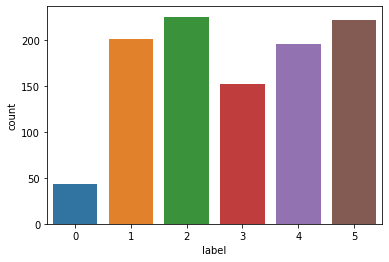

In [ ]:
sns.countplot(x = 'label', data = df1)

In [ ]:
tweet_df

,tweet_id,tweet_text,label
0,'511962276383825920',Prayers for Cabo: Hurricane Odile Roars Through Cabo San Lucas http://t.co/y0WuS1KXlj via @Bloom...,1
1,'511733855871438848',Sammy Hagar's Home Damaged in Hurricane: Sammy Hagar's home was damaged as Hurricane Odile slamm...,1
2,'511493520952393728',"Residents, Tourists Sent to Shelters as Hurricane Odile Makes Landfall – ABC News http://t.co/O0...",1
3,'511547268701646848',Our thoughts go out to all of our friends in Los Cabos and Baja Mexico after being hit by Hurric...,1
4,'511710044044677121',"Does anyone have information on emergency services and potable water in La Paz, BCS? #odile #Hur...",1
...,...,...,...
1257,'514294534487154688',"""In the wake of Hurricane Odile’s destruction to Mexico’s Baja Peninsula, Sammy Hagar...made the...",1
1258,'513733442883035138',LET'S HELP REBUILD BCS DEVASTATED BY HURRICANE ODILE Hurricane Odile damaged Los Cabos. It left...,1
1259,'512216310248259584',BBC News - Hurricane Odile damages Mexico's Baja California resorts http://t.co/3AoNwLWHkl,1
1260,'512079481478324224',"Coachella, keep it safe, remnants arriving soon MT ""@SRE_mx: No deaths or serious injuries of in...",1


##Exploratory Data Analysis

###Pre-processing text data
Most of the text data are cleaned by following below steps.

Remove punctuations

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text) #you may drop it to do new experiments if it helps
    return text

df1['tweet_punct'] = df1['tweet_text'].apply(lambda x: remove_punct(x))
df1.head(10)

,tweet_id,tweet_text,label,tweet_punct
0,'501222299685888000',RT @lilid426: Everyone has all these intense relationship goals when my goal is just getting in ...,0,RT lilid Everyone has all these intense relationship goals when my goal is just getting in a rel...
1,'501203294409457664',@kkfred12 @StayDvpper oh yea I would like to that damn K and shove it up their ass sideways just...,0,kkfred StayDvpper oh yea I would like to that damn K and shove it up their ass sideways just don...
2,'501157833996767233',"RT @fruitpopniall: ""1D are about to split up"" #1DToLiveOnForever http://t.co/4nHQIq03Io",0,RT fruitpopniall D are about to split up DToLiveOnForever httptconHQIqIo
3,'501136832957259776',"@Harry_Styles You are my ☀ You 💡 up my whole day You are my entire 🌎 So please follow me, ...",0,HarryStyles You are my ☀ You 💡 up my whole day You are my entire 🌎 So please follow me I ❤...
4,'501049468511596544',"RT @abonetti420: Swinging blunts round, sun up till sun down",0,RT abonetti Swinging blunts round sun up till sun down
5,'501187710657523712',RT @AbdulWaveey: Currently turning up the brightness on my Tv for the nigeria and ghana matches,0,RT AbdulWaveey Currently turning up the brightness on my Tv for the nigeria and ghana matches
6,'501385992108912640',RT @indykaila: Breaking news coming at 4:30pm for Liverpool. We have exciting update from France...,0,RT indykaila Breaking news coming at pm for Liverpool We have exciting update from France coming...
7,'501231024173367296',RT @lanafttluke: alright goodnight so i can wake up and go go to hell.,0,RT lanafttluke alright goodnight so i can wake up and go go to hell
8,'501164341505183744',RT @TrueBloodHBO: 2 episodes left. Drink up and watch a new episode of #TrueBlood tonight at 9PM...,0,RT TrueBloodHBO episodes left Drink up and watch a new episode of TrueBlood tonight at PM TrueT...
9,'501144319500115969',Drive home from cr is always quicker then the way up I swear,0,Drive home from cr is always quicker then the way up I swear


In [29]:
df1.to_csv('final_data_6_classes.csv')

#Balancing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path= "/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_Hurricane_Odile_Mexico_en"

In [ ]:
cd /content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_Hurricane_Odile_Mexico_en

/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_Hurricane_Odile_Mexico_en


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [30]:
ls

2014_India_floods_CF_labeled_data.tsv  labeling-instructions.txt
final_data_6_classes.csv


In [31]:
df = pd.read_csv('final_data_6_classes.csv')

In [ ]:
df.head()

,Unnamed: 0,tweet_id,tweet_text,label,tweet_punct
0,0,'511962276383825920',Prayers for Cabo: Hurricane Odile Roars Through Cabo San Lucas http://t.co/y0WuS1KXlj via @Bloom...,1,Prayers for Cabo Hurricane Odile Roars Through Cabo San Lucas httptcoyWuSKXlj via BloombergTV
1,1,'511733855871438848',Sammy Hagar's Home Damaged in Hurricane: Sammy Hagar's home was damaged as Hurricane Odile slamm...,2,Sammy Hagars Home Damaged in Hurricane Sammy Hagars home was damaged as Hurricane Odile slammed ...
2,2,'511493520952393728',"Residents, Tourists Sent to Shelters as Hurricane Odile Makes Landfall – ABC News http://t.co/O0...",3,Residents Tourists Sent to Shelters as Hurricane Odile Makes Landfall – ABC News httptcoOtNjheiy...
3,3,'511547268701646848',Our thoughts go out to all of our friends in Los Cabos and Baja Mexico after being hit by Hurric...,1,Our thoughts go out to all of our friends in Los Cabos and Baja Mexico after being hit by Hurric...
4,4,'511710044044677121',"Does anyone have information on emergency services and potable water in La Paz, BCS? #odile #Hur...",5,Does anyone have information on emergency services and potable water in La Paz BCS odile Hurrica...


##Adv_Example_Generation

In [ ]:
!pip install pyarrow==0.16.0
!pip install tensorflow_text
!pip install textattack #very useful python library for text related tasks

     |████████████████████████████████| 63.1 MB 52 kB/s 
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 3.0.0
    Uninstalling pyarrow-3.0.0:
      Successfully uninstalled pyarrow-3.0.0
     |████████████████████████████████| 4.9 MB 5.2 MB/s 
     |████████████████████████████████| 373 kB 5.0 MB/s 
     |████████████████████████████████| 59 kB 8.0 MB/s 
     |████████████████████████████████| 101 kB 12.0 MB/s 
     |████████████████████████████████| 3.1 MB 47.4 MB/s 
     |████████████████████████████████| 322 kB 77.9 MB/s 
     |████████████████████████████████| 69 kB 7.8 MB/s 
     |████████████████████████████████| 769 kB 71.0 MB/s 
     |████████████████████████████████| 298 kB 63.3 MB/s 
     |████████████████████████████████| 895 kB 60.6 MB/s 
     |████████████████████████████████| 61 kB 574 kB/s 
     |████████████████████████████████| 596 kB 72.1 MB/s 
     |████████████████████████████████| 3.3 MB 19.6 MB/s 
     |████████████████████████████████| 2

In [ ]:
from textattack.augmentation import WordNetAugmenter, EmbeddingAugmenter, EasyDataAugmenter, CharSwapAugmenter

textattack: Updating TextAttack package dependencies.
textattack: Downloading NLTK required packages.


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw.zip.
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


textattack: Downloading https://textattack.s3.amazonaws.com/word_embeddings/paragramcf.
100%|██████████| 481M/481M [00:12<00:00, 39.3MB/s]
textattack: Unzipping file /root/.cache/textattack/tmpb33xv6iz.zip to /root/.cache/textattack/word_embeddings/paragramcf.
textattack: Successfully saved word_embeddings/paragramcf to cache.


In [ ]:
df_augmented = pd.DataFrame()  # If using adversarial data on class 0

In [ ]:
print(df.dtypes)

Unnamed: 0      int64
tweet_id       object
tweet_text     object
label           int64
tweet_punct    object
dtype: object


In [ ]:
df_augmented = df[df['label'] == 0]  # If using adversarial data on class 0

In [ ]:
len(df_augmented)  # If using adversarial data on class 0

43

In [ ]:
df_augmented  # If using adversarial data on class 0

,Unnamed: 0,tweet_id,tweet_text,label,tweet_punct
33,41,'512106646198550528',@Azgurl27 hugs back. :) I brought in a crap load of dirt to help keep the water from flooding be...,0,Azgurl hugs back I brought in a crap load of dirt to help keep the water from flooding behind m...
49,61,'511693744752848897',Hey Putin! Didn't you try this humanitarian thing in Georgia? How did it work out for those fo...,0,Hey Putin Didnt you try this humanitarian thing in Georgia How did it work out for those folks...
75,96,'511897399435210752',Such a shame about hurricane odile doing such massive damage to cabo. We have a trip booked ther...,0,Such a shame about hurricane odile doing such massive damage to cabo We have a trip booked there...
77,99,'511756016783208448',I just want to online shop but my dad is using my laptop to look at pictures of the hurricane d...,0,I just want to online shop but my dad is using my laptop to look at pictures of the hurricane d...
92,117,'512272642913894400',@WestJet your #Odile travel advisory pg online needs an update. Vague&amp;generic msg doesn't he...,0,WestJet your Odile travel advisory pg online needs an update Vagueampgeneric msg doesnt helpMayb...
96,121,'511536826763317251',@SSinArkansas May I use your damage pix for an Odile story at http://t.co/jdD929DfzZ? Will post ...,0,SSinArkansas May I use your damage pix for an Odile story at httptcojdDDfzZ Will post wname credit
106,133,'511796695689347072',"Spotted on the Rodarte Catwalk, hand painted hairpieces. We are loving Odile Gilbert direct tech...",0,Spotted on the Rodarte Catwalk hand painted hairpieces We are loving Odile Gilbert direct techni...
108,137,'512079030468636673',"My Cabo dreams are officially killed by Odile. Cancun, here I come!!!",0,My Cabo dreams are officially killed by Odile Cancun here I come
143,179,'511890232514326529',Could mystery enterovirus be in AZ?-NFL brings in Dom Violence help; Odile could b n ordeal for ...,0,Could mystery enterovirus be in AZNFL brings in Dom Violence help Odile could b n ordeal for AZ ...
161,200,'511598712280588288',#Habs #HollyoaksAutumnTrailer #HurricaneODILE #HipHopRealSkillsVol2 check it outὐAὐA https://t.c...,0,Habs HollyoaksAutumnTrailer HurricaneODILE HipHopRealSkillsVol check it outὐAὐA httpstcotMtKOYpH...


In [ ]:
aug = EmbeddingAugmenter()  # If using adversarial data on class 0

In [ ]:
for i in df_augmented.index:    # If using adversarial data on class 0
  text= df_augmented.at[i, 'tweet_punct']
  adv_example= aug.augment(text)
  df_augmented.at[i, 'tweet_punct'] = adv_example

In [ ]:
df_augmented  # If using adversarial data on class 0

,Unnamed: 0,tweet_id,tweet_text,label,tweet_punct
33,41,'512106646198550528',@Azgurl27 hugs back. :) I brought in a crap load of dirt to help keep the water from flooding be...,0,[Azgurl hugs back I brought in a crap burdened of dirt to help maintaining the water from flood...
49,61,'511693744752848897',Hey Putin! Didn't you try this humanitarian thing in Georgia? How did it work out for those fo...,0,[Hey Putin Didnt you try this humanistic thing in Georgia How did it work out for those folks ...
75,96,'511897399435210752',Such a shame about hurricane odile doing such massive damage to cabo. We have a trip booked ther...,0,[Such a ashamed about cyclone odile doing such massive damage to cabo We have a trip booked ther...
77,99,'511756016783208448',I just want to online shop but my dad is using my laptop to look at pictures of the hurricane d...,0,[I just want to online shop but my poppa is using my laptop to look at imagery of the hurricane...
92,117,'512272642913894400',@WestJet your #Odile travel advisory pg online needs an update. Vague&amp;generic msg doesn't he...,0,[WestJet your Odile travel councillors pg online needs an upgraded Vagueampgeneric msg doesnt he...
96,121,'511536826763317251',@SSinArkansas May I use your damage pix for an Odile story at http://t.co/jdD929DfzZ? Will post ...,0,[SSinArkansas May I utilised your damage pix for an Odile story at httptcojdDDfzZ Will post wnam...
106,133,'511796695689347072',"Spotted on the Rodarte Catwalk, hand painted hairpieces. We are loving Odile Gilbert direct tech...",0,[Spotted on the Rodarte Catwalk hand lacquer hairpieces We are loving Odile Gilbert direct techn...
108,137,'512079030468636673',"My Cabo dreams are officially killed by Odile. Cancun, here I come!!!",0,[My Cabo dreams are officially slain by Odile Cancun here I come]
143,179,'511890232514326529',Could mystery enterovirus be in AZ?-NFL brings in Dom Violence help; Odile could b n ordeal for ...,0,[Could mystery enterovirus be in AZNFL brings in Dom Violence assisting Odile could b n ordeal f...
161,200,'511598712280588288',#Habs #HollyoaksAutumnTrailer #HurricaneODILE #HipHopRealSkillsVol2 check it outὐAὐA https://t.c...,0,[Habs HollyoaksAutumnTrailer HurricaneODILE HipHopRealSkillsVol check it outὐAὐA httpstcotMtKOYp...


In [ ]:
df_augmented.to_csv('Irrel_Adv_6_Classes.csv', index=False)   # If using adversarial data on class 0

#Creating New Balanced Dataset

In [ ]:
ls

2014_Hurricane_Odile_Mexico_en_CF_labeled_data.tsv  test_labels.csv
final_balanced_data.csv                             test_labels.txt
final_data_6_classes.csv                            test_text.txt
final_data.csv                                      train_labels.csv
Irrel_Adv_6_Classes.csv                             train_labels.txt
Irrel_Adv.csv                                       train_text.txt
labeling-instructions.txt                           val_labels.csv
logs/                                               val_labels.txt
results/                                            val_text.txt


In [32]:
df = pd.read_csv('final_data_6_classes.csv')

In [35]:
len(df[df.label==0]), len(df[df.label==1]), len(df[df.label==2]), len(df[df.label==3]), len(df[df.label==4]), len(df[df.label==5])

(498, 71, 66, 474, 45, 206)

In [33]:
len(df)

1360

In [ ]:
df_augmented = pd.read_csv('Irrel_Adv_6_Classes.csv') # If using adversarial data on class 0

In [ ]:
len(df_augmented) # If using adversarial data on class 0

43

In [ ]:
df_full = df.append(df_augmented) # If using adversarial data on class 0

In [ ]:
len(df_full)  # If using adversarial data on class 0

1080

In [ ]:
df_irrel = pd.DataFrame() # If using adversarial data on class 0

In [ ]:
df_irrel = df_full[df_full['label'] == 0] # If using adversarial data on class 0

In [ ]:
len(df_irrel) # If using adversarial data on class 0

86

In [ ]:
df_irrel_oversamp = pd.DataFrame() # If using adversarial data on class 0

In [ ]:
for i in range(3):    # If using adversarial data on class 0
  df_irrel_oversamp= df_irrel_oversamp.append(df_irrel)

In [ ]:
len(df_irrel_oversamp) # If using adversarial data on class 0

In [48]:
#for oversampling whichever class is needed
df_class1 = pd.DataFrame()
df_class2 = pd.DataFrame()
df_class4 = pd.DataFrame()

In [49]:
df_class1_oversamp = pd.DataFrame()
df_class2_oversamp = pd.DataFrame()
df_class4_oversamp = pd.DataFrame()

In [50]:
#for oversampling whichever class is needed
df_class1 = df[df['label'] == 1]
df_class2 = df[df['label'] == 2]
df_class4 = df[df['label'] == 4]

In [51]:
len(df_class1), len(df_class2), len(df_class4)

(71, 66, 45)

In [54]:
for i in range(3):
  df_class1_oversamp= df_class1_oversamp.append(df_class1)


In [56]:
for i in range(3):
  df_class2_oversamp= df_class2_oversamp.append(df_class2)

In [57]:
for i in range(5):
  df_class4_oversamp= df_class4_oversamp.append(df_class4)

In [58]:
len(df_class1_oversamp), len(df_class2_oversamp), len(df_class4_oversamp)

(213, 198, 225)

In [59]:
final_df = df.append(df_class1_oversamp).append(df_class2_oversamp).append(df_class4_oversamp)

In [ ]:
final_df = df.append(df_irrel_oversamp) # If using adversarial data on class 0

In [62]:
len(final_df[final_df.label==0]), len(final_df[final_df.label==1]), len(final_df[final_df.label==2]), len(final_df[final_df.label==3]), len(final_df[final_df.label==4]), len(final_df[final_df.label==5])

(498, 284, 264, 474, 270, 206)

In [63]:
final_df = final_df.sample(frac = 1)

In [64]:
len(final_df)

1996

In [ ]:
#df_augmented.to_csv('Irrel_Adv.csv', index=False)
df_full

,Unnamed: 0,tweet_id,tweet_text,label,tweet_punct
385,494,'511645929351675904',Resorts report damage from Hurricane Odile http://t.co/KhLLRBFm1N #keeptraveling,2,Resorts report damage from Hurricane Odile httptcoKhLLRBFmN keeptraveling
377,486,'511523458573160448',RT @Ants_SNEweather: Even though Odile has made landfall and center is overland currently he is ...,5,RT AntsSNEweather Even though Odile has made landfall and center is overland currently he is sti...
962,1171,'511591352669204480',"( #TwiiteroXX1 ) A Path of Hurricane Odile's Destruction, Seen Through Instagram: Hurricane O......",2,TwiiteroXX A Path of Hurricane Odiles Destruction Seen Through Instagram Hurricane O httptcoQg...
520,653,'511645568654131200',RT @BlakeHarrington: Prayers to our friends and family in #Cabo #HurricaneODILE #LosCabos #cabos...,1,RT BlakeHarrington Prayers to our friends and family in Cabo HurricaneODILE LosCabos cabosanlucas
754,927,'516944744283648001',RT @GreaterGoodorg: The destruction from Hurricane Odile just 11 days ago has left thousands of ...,5,RT GreaterGoodorg The destruction from Hurricane Odile just days ago has left thousands of anim...
...,...,...,...,...,...
20,680,'511674835261747200',@thehybridprince Hurricane Odile down near Mexico. I couldn't help it.,0,['thehybridprince Hurricane Odile down near Mexico I becuase help it']
277,356,'514062949464702976',"Watch @fox40 video of our efforts http://t.co/xtayHldcKy We're hearing about hotels, but not the...",4,Watch fox video of our efforts httptcoxtayHldcKy Were hearing about hotels but not the local nee...
411,522,'512283602080784385',RT @earthskyscience: Major Hurricane Odile struck Baja late Sunday. Photos of damage and firsth...,5,RT earthskyscience Major Hurricane Odile struck Baja late Sunday Photos of damage and firsthand...
245,318,'511617863023853568',my heart hurts looking at the devastation from #HurricaneODILE in #Cabo. hope all friends and f...,1,my heart hurts looking at the devastation from HurricaneODILE in Cabo hope all friends and fami...


In [65]:
final_df.to_csv('final_balanced_data_6_classes.csv', index=False)

#Saving text files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_Hurricane_Odile_Mexico_en

/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/2014_Hurricane_Odile_Mexico_en


In [ ]:
ls

2014_Hurricane_Odile_Mexico_en_CF_labeled_data.tsv  test_labels.txt
final_balanced_data_6_classes.csv                   test_text_6classes.txt
final_balanced_data.csv                             test_text.txt
final_data_6_classes.csv                            train_labels_6classes.txt
final_data.csv                                      train_labels.csv
Irrel_Adv_6_Classes.csv                             train_labels.txt
Irrel_Adv.csv                                       train_text_6classes.txt
labeling-instructions.txt                           train_text.txt
logs/                                               val_labels_6classes.txt
results/                                            val_labels.csv
results_6classes/                                   val_labels.txt
test_labels_6classes.txt                            val_text_6classes.txt
test_labels.csv                                     val_text.txt


In [ ]:
final_balanced_data_6_classes = pd.read_csv('final_balanced_data_6_classes.csv')

In [ ]:
all_text = pd.DataFrame(final_balanced_data_6_classes[['tweet_punct']])

In [ ]:
final_balanced_data_6_classes['label'] = final_balanced_data_6_classes['label'].astype(int)

In [ ]:
print (final_balanced_data_6_classes.dtypes)

Unnamed: 0      int64
tweet_id       object
tweet_text     object
label           int64
tweet_punct    object
dtype: object


In [ ]:
all_labels = pd.DataFrame(final_balanced_data_6_classes[['label']])

In [ ]:
#Play with these Hyper-Parameters
'''
train_frac= int(0.7*length)
val_frac= int(0.8*length)
test_frac= int(length+1)
'''

'\ntrain_frac= int(0.7*length)\nval_frac= int(0.8*length)\ntest_frac= int(length+1)\n'

In [ ]:
def save(df, train_frac, val_frac, test_frac, string):
  length= len(df)
  tf=train_frac #0.7
  vf=train_frac+val_frac #0.8
  train_frac= int(tf*length)
  val_frac= int(vf*length)
  test_frac= int(length+1)

  train= df.iloc[0:train_frac, :]
  val= df.iloc[train_frac:val_frac, :]
  test=df.iloc[val_frac:, :]

  if string== "text":
    fmt= '%s'
    np.savetxt(r'train_text.txt', train.values, fmt=fmt)
    np.savetxt(r'val_text.txt', val.values, fmt=fmt)
    np.savetxt(r'test_text.txt', test.values, fmt=fmt)
  else:
    '''
    train.to_csv('train_labels.csv')
    val.to_csv('val_labels.csv')
    test.to_csv('test_labels.csv')
    '''
    fmt='%s'
    np.savetxt(r'train_labels.txt', train.values, fmt=fmt)
    np.savetxt(r'val_labels.txt', val.values, fmt=fmt)
    np.savetxt(r'test_labels.txt', test.values, fmt=fmt)
    

In [ ]:
save(all_text, 0.7, 0.1, 0.2, "text")

In [ ]:
save(all_labels, 0.7, 0.1, 0.2, "labels")

#Arabic Crisis Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/CrisisData_Arabic/البيانات/"

In [ ]:
cd /content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/CrisisData_Arabic/البيانات/

/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/CrisisData_Arabic/البيانات


In [ ]:
pwd

'/content/drive/My Drive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data/CrisisNLP_labeled_data_crowdflower/CrisisData_Arabic/البيانات'

In [ ]:
ls -l

total 6455
-rw------- 1 root root  555565 Nov 21 16:29 Beirut.csv
-rw------- 1 root root  288547 Nov 21 16:18 Cairo.csv
-rw------- 1 root root 1222294 Nov 21 16:33 COVID.csv
-rw------- 1 root root  542625 Nov 21 16:32 Dragon.csv
-rw------- 1 root root  736737 Nov 21 16:27 Hafr.csv
-rw------- 1 root root 1022418 Nov 21 16:23 Jordan.csv
-rw------- 1 root root 2239533 Nov 21 16:28 Kuwait.csv


In [ ]:
!pip install transformers
!pip install sentencepiece

     |████████████████████████████████| 3.1 MB 5.4 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 3.3 MB 32.7 MB/s 
     |████████████████████████████████| 895 kB 48.5 MB/s 
     |████████████████████████████████| 596 kB 49.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 1.2 MB 5.5 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [ ]:
covid_arabic = pd.read_csv('COVID.csv')

In [ ]:
covid_arabic.head()

,ID,Text,Processed,Relevance
0,[1262140646510526472],['https://t.co/koTgnYkcc6\nمخطط الخير #شمال_الرياض #العودة_بعد_كورونا قروب مخططات الخير #استثنا...,مخطط الخير شمال الرياض العودة بعد كورونا قروب مخططات الخير استثناء الممارسين الصحيين,irrelevant
1,[1262140648658001921],['RT @HashKSA: #مجتمع_تويتر ينعي #الممرض_خالد_الحسيني -رحمه الله- بعد وفاته بسبب فيروس #كورونا أ...,مجتمع تويتر ينعي الممرض خالد الحسيني رحمه الله بعد وفاته بسبب فيروس كورونا أثناء تأدية واجبه أبط...,relevant
2,[1262140651346550786],['RT @mnasor39994: ايه نعم انا قبل ازمة #كورونا مفعل الرسيفر حقي قبله بشهر ويوم جات هٰذي الجائحة...,ايه نعم انا قبل ازمة كورونا مفعل الرسيفر حقي قبله بشهر ويوم جات هٰذي الجائحة حمانا الله وياكم من...,irrelevant
3,[1262140653435269123],['RT @TheArabHash: مغردون ينعون أحد أبطال الصحة بمكة المكرمة \u2067#الممرض_خالد_الحسيني بعد وفات...,مغردون ينعون أحد أبطال الصحة بمكة المكرمة ⁧ الممرض خالد الحسيني بعد وفاته نتيجة إصابته بفيروس ⁧ ...,relevant
4,[1262140655050121230],['RT @8XcAIaZZYDt4eeW: شركة تعقيم بالرياض\nتعقيم منازل\nتعقيم فلل\nتعقيم مدارس\n#تعقيم مكاتب\n#ت...,شركة تعقيم بالرياض تعقيم منازل تعقيم فلل تعقيم مدارس تعقيم مكاتب تعقيم مستشفيات تعقيم قصور تعقيم...,irrelevant


In [ ]:
covid_arabic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         2005 non-null   object
 1   Text       2005 non-null   object
 2   Processed  2005 non-null   object
 3   Relevance  2005 non-null   object
dtypes: object(4)
memory usage: 62.8+ KB


In [ ]:
len(covid_arabic[covid_arabic['Relevance']=="irrelevant"]) # irrelevant data id 9 times less than relevant data so do oversampling

223

##Machine Translation of tweets from Arabic to English

In [ ]:
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer

In [ ]:
model = M2M100ForConditionalGeneration.from_pretrained("facebook/m2m100_418M")
tokenizer = M2M100Tokenizer.from_pretrained("facebook/m2m100_418M")

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.80G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.54M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.31M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/272 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

In [ ]:
df_translated = pd.DataFrame()

In [ ]:
df_translated = covid_arabic.copy(deep = True)

In [ ]:
df_translated.head()

,ID,Text,Processed,Relevance
0,[1262140646510526472],['https://t.co/koTgnYkcc6\nمخطط الخير #شمال_الرياض #العودة_بعد_كورونا قروب مخططات الخير #استثنا...,مخطط الخير شمال الرياض العودة بعد كورونا قروب مخططات الخير استثناء الممارسين الصحيين,irrelevant
1,[1262140648658001921],['RT @HashKSA: #مجتمع_تويتر ينعي #الممرض_خالد_الحسيني -رحمه الله- بعد وفاته بسبب فيروس #كورونا أ...,مجتمع تويتر ينعي الممرض خالد الحسيني رحمه الله بعد وفاته بسبب فيروس كورونا أثناء تأدية واجبه أبط...,relevant
2,[1262140651346550786],['RT @mnasor39994: ايه نعم انا قبل ازمة #كورونا مفعل الرسيفر حقي قبله بشهر ويوم جات هٰذي الجائحة...,ايه نعم انا قبل ازمة كورونا مفعل الرسيفر حقي قبله بشهر ويوم جات هٰذي الجائحة حمانا الله وياكم من...,irrelevant
3,[1262140653435269123],['RT @TheArabHash: مغردون ينعون أحد أبطال الصحة بمكة المكرمة \u2067#الممرض_خالد_الحسيني بعد وفات...,مغردون ينعون أحد أبطال الصحة بمكة المكرمة ⁧ الممرض خالد الحسيني بعد وفاته نتيجة إصابته بفيروس ⁧ ...,relevant
4,[1262140655050121230],['RT @8XcAIaZZYDt4eeW: شركة تعقيم بالرياض\nتعقيم منازل\nتعقيم فلل\nتعقيم مدارس\n#تعقيم مكاتب\n#ت...,شركة تعقيم بالرياض تعقيم منازل تعقيم فلل تعقيم مدارس تعقيم مكاتب تعقيم مستشفيات تعقيم قصور تعقيم...,irrelevant


In [ ]:
covid_arabic.head()

,ID,Text,Processed,Relevance
0,[1262140646510526472],['https://t.co/koTgnYkcc6\nمخطط الخير #شمال_الرياض #العودة_بعد_كورونا قروب مخططات الخير #استثنا...,مخطط الخير شمال الرياض العودة بعد كورونا قروب مخططات الخير استثناء الممارسين الصحيين,irrelevant
1,[1262140648658001921],['RT @HashKSA: #مجتمع_تويتر ينعي #الممرض_خالد_الحسيني -رحمه الله- بعد وفاته بسبب فيروس #كورونا أ...,مجتمع تويتر ينعي الممرض خالد الحسيني رحمه الله بعد وفاته بسبب فيروس كورونا أثناء تأدية واجبه أبط...,relevant
2,[1262140651346550786],['RT @mnasor39994: ايه نعم انا قبل ازمة #كورونا مفعل الرسيفر حقي قبله بشهر ويوم جات هٰذي الجائحة...,ايه نعم انا قبل ازمة كورونا مفعل الرسيفر حقي قبله بشهر ويوم جات هٰذي الجائحة حمانا الله وياكم من...,irrelevant
3,[1262140653435269123],['RT @TheArabHash: مغردون ينعون أحد أبطال الصحة بمكة المكرمة \u2067#الممرض_خالد_الحسيني بعد وفات...,مغردون ينعون أحد أبطال الصحة بمكة المكرمة ⁧ الممرض خالد الحسيني بعد وفاته نتيجة إصابته بفيروس ⁧ ...,relevant
4,[1262140655050121230],['RT @8XcAIaZZYDt4eeW: شركة تعقيم بالرياض\nتعقيم منازل\nتعقيم فلل\nتعقيم مدارس\n#تعقيم مكاتب\n#ت...,شركة تعقيم بالرياض تعقيم منازل تعقيم فلل تعقيم مدارس تعقيم مكاتب تعقيم مستشفيات تعقيم قصور تعقيم...,irrelevant


In [ ]:
df_translated_small = covid_arabic.iloc[:5,:]

In [ ]:
tokenizer.src_lang = "ar"
for i in df_translated_small.index:
  arabic_text= df_translated_small.at[i, 'Processed']
  encoded_ar = tokenizer(arabic_text, return_tensors= "pt")
  generated_tokens_eng = model.generate(**encoded_ar, forced_bos_token_id = tokenizer.get_lang_id("en"))
  eng_text = tokenizer.batch_decode(generated_tokens_eng, skip_special_tokens= True)
  df_translated_small.at[i, 'Processed'] = eng_text

In [ ]:
df_translated_small.head()

,ID,Text,Processed,Relevance
0,[1262140646510526472],['https://t.co/koTgnYkcc6\nمخطط الخير #شمال_الرياض #العودة_بعد_كورونا قروب مخططات الخير #استثنا...,[The Northern Riyadh Charity Plan Returns After the Crown Crossing Charity Plan Except Health Pr...,irrelevant
1,[1262140648658001921],['RT @HashKSA: #مجتمع_تويتر ينعي #الممرض_خالد_الحسيني -رحمه الله- بعد وفاته بسبب فيروس #كورونا أ...,[Twitter community acknowledges Nurse Khaled Al-Husseini after his death due to coronavirus whil...,relevant
2,[1262140651346550786],['RT @mnasor39994: ايه نعم انا قبل ازمة #كورونا مفعل الرسيفر حقي قبله بشهر ويوم جات هٰذي الجائحة...,"[I'm going to have a lot of money, I'm going to have a lot of money, I'm going to have a lot of ...",irrelevant
3,[1262140653435269123],['RT @TheArabHash: مغردون ينعون أحد أبطال الصحة بمكة المكرمة \u2067#الممرض_خالد_الحسيني بعد وفات...,[One of the Heroes of Health in Mumbai: Dr. Khaled Al-Hussein after his death as a result of his...,relevant
4,[1262140655050121230],['RT @8XcAIaZZYDt4eeW: شركة تعقيم بالرياض\nتعقيم منازل\nتعقيم فلل\nتعقيم مدارس\n#تعقيم مكاتب\n#ت...,[Home Health Health Health Health Health Health Health Health Health Health Health Health Health...,irrelevant


#Dataset Concatenation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
base_path = '/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data_crowdflower'

In [ ]:
cd /content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data_crowdflower

In [ ]:
pwd

'/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/CrisisNLP_labeled_data_crowdflower'

In [ ]:
df1 = pd.read_csv(base_path+'/2013_Pakistan_eq'+'/final_balanced_data.csv')

In [ ]:
df1

,Unnamed: 0,tweet_id,tweet_text,label,tweet_punct
0,1818,'384089974577971200',RT @everyEarthquake: USGS reports a M2.8 #eart...,1,RT everyEarthquake USGS reports a M earthquake...
1,1007,'383900239314550784',RT @Aak0: Authorities shut down #Pakistan's fi...,0,RT Aak Authorities shut down Pakistans first g...
2,395,'384996134705307648',"#Sismo #Earthquake M 2.3, 60km SW of Valdez, A...",1,Sismo Earthquake M km SW of Valdez Alaska htt...
3,1774,'384701354398076929',"#Earthquake M 4.9, 18km ESE of Kitaibaraki, Ja...",0,['Tremor M km ESE of Kitaibaraki Japan Monday...
4,691,'384173623038058498',"RT +10 ""@haziq_qadri: Happy birthday to our Qu...",0,['RT haziqqadri Happy birthday to our Quaid s...
...,...,...,...,...,...
2812,425,'383961239552294912',RT @MehrTarar: #BalochistanEarthquake Entire v...,1,RT MehrTarar BalochistanEarthquake Entire vill...
2813,1647,'383461943757271040','Taliban should open their offices 4 peace tal...,0,Taliban should open their offices peace talks...
2814,1131,'383937033514676224',"""You are what you believe. And on this belief,...",0,['You are what you believe Und on this belief ...
2815,1758,'384336163214864385',It is due to the #FailedSystem that we ourselv...,0,['It is due to the FailedSystem that we oursel...


In [ ]:
df2 = pd.read_csv(base_path+'/2014_California_Earthquake'+'/final_balanced_data.csv')
df3 = pd.read_csv(base_path+'/2014_Chile_Earthquake_en'+'/final_balanced_data.csv')
df4 = pd.read_csv(base_path+'/2014_Hurricane_Odile_Mexico_en'+'/final_balanced_data.csv')
df5 = pd.read_csv(base_path+'/2014_India_floods'+'/final_balanced_data.csv')
df6 = pd.read_csv(base_path+'/2014_Middle_East_Respiratory_Syndrome_en'+'/final_balanced_data.csv')
df7 = pd.read_csv(base_path+'/2014_Pakistan_floods'+'/final_balanced_data.csv')
df8 = pd.read_csv(base_path+'/2014_Philippines_Typhoon_Hagupit_en'+'/final_balanced_data.csv')
df9 = pd.read_csv(base_path+'/2015_Nepal_Earthquake_en'+'/final_balanced_data.csv')
df10 = pd.read_csv(base_path+'/2015_Cyclone_Pam_en'+'/final_balanced_data.csv')
df11 = pd.read_csv(base_path+'/2014_ebola_cf'+'/final_balanced_data.csv')

In [ ]:
df_final = pd.DataFrame()

In [ ]:
df_final = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])

In [ ]:
pd.to_csv('df_final.csv')

#Train,Val,Test Splits

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [ ]:
tweet_df = pd.read_csv('/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/df_final.csv')

In [ ]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31626 entries, 0 to 31625
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    31626 non-null  int64  
 1   Unnamed: 0.1  2817 non-null   float64
 2   tweet_id      31626 non-null  object 
 3   tweet_text    31626 non-null  object 
 4   label         31626 non-null  int64  
 5   tweet_punct   31626 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB


In [ ]:
tweet_df.head()

,Unnamed: 0,Unnamed: 0.1,tweet_id,tweet_text,label,tweet_punct
0,981,NaN,'577163513933639680',#Vanuatu #peacecorps volunteers are missing their families in #Vanuatu and drawing pictures for ...,0,Vanuatu peacecorps volunteers are missing their families in Vanuatu and drawing pictures for the...
1,946,NaN,'497770410583150592',World: Uganda patient with Ebola-like signs tests negative http://t.co/wCQuGvsg1B,1,World Uganda patient with Ebolalike signs tests negative httptcowCQuGvsgB
2,894,NaN,'512015479763120128',Foreign http://t.co/iE7jEjs7Yy by Lody Cash #HurricaneODILE #humiliation #healthcare #HelpSaveKe...,0,['Foreigners httptcoiEjEjsYy by Lody Cash HurricaneODILE humiliation healthcare HelpSaveKelechi ...
3,296,NaN,'512051426676465664',RT @ErinSaidItWould: Wettest 12hrs in Tucson: Wed 6p-Thu 6am. Thursday morning commute will be a...,0,RT ErinSaidItWould Wettest hrs in Tucson Wed pThu am Thursday morning commute will be a soggy on...
4,2428,NaN,'504143827457044480',"Top story: How did the Napa earthquake affect sleep? https://t.co/NNoDPhP2Ps, see more http://t....",1,Top story How did the Napa earthquake affect sleep httpstcoNNoDPhPPs see more httptcoMbLLNxzsw


In [ ]:
all_text = pd.DataFrame(tweet_df[['tweet_punct']])

In [ ]:
all_labels = pd.DataFrame(tweet_df[['label']])

In [ ]:
4000/31626

0.1264782141276165

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/

/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual


In [ ]:
pwd

'/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual'

In [ ]:
def save(df, train_frac, val_frac, test_frac, string):
  length= len(df)
  tf=train_frac #0.7
  vf=train_frac+val_frac #0.8
  train_frac= int(tf*length)
  val_frac= int(vf*length)
  test_frac= int(length+1)

  train= df.iloc[0:train_frac, :]
  val= df.iloc[train_frac:val_frac, :]
  test=df.iloc[val_frac:, :]

  if string== "text":
    fmt= '%s'
    np.savetxt(r'train_text.txt', train.values, fmt=fmt)
    np.savetxt(r'val_text.txt', val.values, fmt=fmt)
    np.savetxt(r'test_text.txt', test.values, fmt=fmt)
  else:
    '''
    train.to_csv('train_labels.csv')
    val.to_csv('val_labels.csv')
    test.to_csv('test_labels.csv')
    '''
    fmt='%s'
    np.savetxt(r'train_labels.txt', train.values, fmt=fmt)
    np.savetxt(r'val_labels.txt', val.values, fmt=fmt)
    np.savetxt(r'test_labels.txt', test.values, fmt=fmt)

In [ ]:
save(all_text, 0.8, 0.08, 0.12, "text")

In [ ]:
save(all_labels, 0.8, 0.08, 0.12, "labels")

#Analysing Balanced Data of 6 Class cases

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

In [ ]:
cd "/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/"

/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual


In [ ]:
ls

'CrisisNLP_Data_Handling_final_version_6_classes_with Machine_Translation.ipynb'
 CrisisNLP_labeled_data/
 CrisisNLP_labeled_data_crowdflower/
 df_final.csv
 MultiLingual_Trial_Notebook.ipynb
 New_CrisisNLP_labeled_data_crowdflower/
 test_labels.csv
 test_labels.txt
 test_text.txt
 train_labels.csv
 train_labels.txt
 train_text.txt
 val_labels.csv
 val_labels.txt
 val_text.txt
 XLM_T_Extract_embeddings_from_text_file.ipynb
 XLM_T_Fine_tuning_on_custom_datasets.ipynb
 XLM_T_Playground.ipynb
 XLM_T_Run_a_classifier_on_a_text_file.ipynb


In [ ]:
cd New_CrisisNLP_labeled_data_crowdflower

/content/drive/MyDrive/ChiSquareX_NLP_Tutoring/Multi_Lingual/New_CrisisNLP_labeled_data_crowdflower


In [ ]:
ls

 2013_Pakistan_eq/                 2014_Middle_East_Respiratory_Syndrome_en/
 2014_California_Earthquake/       2014_Pakistan_floods/
 2014_Chile_Earthquake_cl/         2014_Philippines_Typhoon_Hagupit_en/
 2014_Chile_Earthquake_en/         2015_Cyclone_Pam_en/
 2014_ebola_cf/                    2015_Nepal_Earthquake_en/
 2014_Hurricane_Odile_Mexico_en/   README.txt
 2014_India_floods/               'Terms of use.txt'


In [ ]:
cd /content/drive/My Drive/ChiSquareX_NLP_Tutoring/Multi_Lingual/New_CrisisNLP_labeled_data_crowdflower/2015_Cyclone_Pam_en/

/content/drive/My Drive/ChiSquareX_NLP_Tutoring/Multi_Lingual/New_CrisisNLP_labeled_data_crowdflower/2015_Cyclone_Pam_en


In [ ]:
ls

2015_Cyclone_Pam_en_CF_labeled_data.tsv  test_text.txt
final_balanced_data_6_classes.csv        train_labels.txt
final_data_6_classes.csv                 train_text.txt
Irrel_Adv_6_Classes.csv                  val_labels.txt
labeling-instructions.txt                val_text.txt
test_labels.txt


In [ ]:
df1 = pd.read_csv('final_data_6_classes.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1954 entries, 0 to 1953
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1954 non-null   int64 
 1   tweet_id     1954 non-null   object
 2   tweet_text   1954 non-null   object
 3   label        1954 non-null   int64 
 4   tweet_punct  1954 non-null   object
dtypes: int64(2), object(3)
memory usage: 76.5+ KB


In [ ]:
len(df1[df1.label==0]), len(df1[df1.label==1]), len(df1[df1.label==2]), len(df1[df1.label==3]), len(df1[df1.label==4]), len(df1[df1.label==5])

(496, 185, 212, 208, 363, 490)

In [ ]:
'''
New Final Class Labels:

not_related_or_irrelevant == 0
sympathy_and_emotional_support + caution_and_advice == 1
infrastructure_and_utilities_damage == 2
displaced_people_and_evacuations + injured_or_dead_people + missing_trapped_or_found_people == 3
donation_needs_or_offers_or_volunteering_services == 4
other_useful_information == 5

'''